<font color=blue> Привет еще раз. Спасибо, что доделал работу. Теперь мои комментарии выделены синим.
    
---

---
## Комментарий от наставника

Привет! Спасибо, что сдал задание:) В целом, работа производит положительное впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии в ходе дальнейшей работы.

---

## Исследование надёжности заёмщиков



Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### План исследования
**1. Предобработка данных:**    
    - Определить и заполните пропущенные значения
    - Сделать замену типа данных, если потребуется
**2. Удаление дубликатов**  
**3. Категоризация данных**  
**4. Ответить на вопросы:**  
    - Есть ли зависимость между наличием детей и возвратом кредита в срок?  
    - Есть ли зависимость между семейным положением и возвратом кредита в срок?  
    - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  
    - Как разные цели кредита влияют на его возврат в срок?  

### Описание данных:  
- children — количество детей в семье  
- days_employed — общий трудовой стаж в днях  
- dob_years — возраст клиента в годах  
- education — уровень образования клиента  
- education_id — идентификатор уровня образования  
- family_status — семейное положение  
- family_status_id — идентификатор семейного положения  
- gender — пол клиента  
- income_type — тип занятости  
- debt — имел ли задолженность по возврату кредитов  
- total_income — ежемесячный доход  
- purpose — цель получения кредита  

---
## Комментарий от наставника


Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать(если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут (см. пример). Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

<font color=red> Пример: </font>
---
Описание данных: 
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- ...
    
---

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

In [7]:
client_debts = pd.read_csv('/datasets/data.csv')
client_debts.to_csv('lala.csv')
client_debts.info()
client_debts.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод



На первый взгляд данные в таблице представленны с соответствующими типами. 

Есть пропуски в колонках 'days_employed' и 'total_income', причем количество пропущенных строк у них одинаково, возможно, данные там отсутствует в одних и тех же строчках. Вероятно была утеряна информация о трудовой деятельности некоторой части клиентов. Пропущенные данные составляют около 10% (1 - 19351/21525). Колонка 'total_income' (ежемесячный доход) понадобится нам в дальнейшем для исследования, этими записям не получится пренебречь. Для их заполнения нужно будет подобрать типичные значения для разных групп занятости.

Уже по первым строчкам таблицы видно, что в колонке 'стаж в днях' ('days_emploed') присутствуют отрицательные значения. В целом похоже, что для этих данных отрицательный знак поставлен случайно, их можно использовать в дальнейшем и перевести в года.  
Кроме того, записи в столбцах 'days_emploed', 'total_income' представлены в формате с плавающей точкой, -- нужно будет представить их в более удобном для арифметических операций формате.  

В колонке 'education' есть дубликаты, возможно отсутсвовал единый формат записи информации об образовании.


 


---
## Комментарий от наставника

Хорошо бы выводить больше 10 строчек таблицы. Меньше не рекомендуется, можно не увидеть структуру данных. У меня есть несколько комментариев:

- желательно давать переменным осознанные имена. Таблица про клиентов - название следовало выбрать соответствующее;
- импорт библиотек и считывание данных лучше проводить в разных ячейках;
- выводы грамотные. Помимо результатов желательно высказывать и гипотезы о том, как исправить неточности или ошибки в данных. 

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. Все свои соображения о выявленных закономерностях необходимо писать.

---

### Шаг 2. Предобработка данных

### Обработка пропусков

Есть одинаковое количество пропущенных строк в колонках 'days_employed' и 'total_income'. Хочется посмотреть, в одинаковых ли строчках, и визуально оценить, какие там данные.

In [3]:
client_debts[client_debts['total_income'].isnull()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

In [4]:
client_debts[client_debts['total_income'].isnull()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [5]:
client_debts['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [6]:
client_debts[client_debts['total_income'].isnull()]['debt'].value_counts()

0    2004
1     170
Name: debt, dtype: int64

Данные об общем трудовом стаже и ежемесячном доходе пропущены в одинаковых строках. Каких-то зависимостей с другими данными выявить не удалось. Например, среди данных с пропусками и без фигурирует примерно одинаковая доля должников. Можно предположить, что эти пропуски полностью случайны --  возможно графы в анкете клиента о его трудовой деятельности не прошли цифровую обработку.

Пропущены количественные переменные. Заполним пропуски в колонке ежемесячный доход `'total_income'` исходя из медианного значения в подходящей группе занятости.

In [7]:
client_debts.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [8]:
client_debts['total_income'] = client_debts.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))
client_debts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


---
## Комментарий от наставника

Хороший способ заполнения пропусков в столбце дохода. В отличие от циклов, он будет работать быстро даже на большом объеме данных.

---

Пропущенные значения в колонке трудовой стаж `'days_employed'` можно попытаться так же заполнить
медианными значениями из групп занятости или возраста.

In [9]:
client_debts.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете           -3296.759962
госслужащий         -2689.368353
компаньон           -1547.382223
пенсионер          365213.306266
предприниматель      -520.848083
сотрудник           -1574.202821
студент              -578.751554
Name: days_employed, dtype: float64

Стаж `'days_employed'` в некоторых записях отрицателен, заменим значения на абсолютные, проверим, что отрицательных значений не осталось:

In [10]:
client_debts['days_employed'] = client_debts['days_employed'].apply(lambda x: abs(x))
len(client_debts[client_debts['days_employed'] < 0])

0

Для визуального удобства создадим колонку с конвертированными в года днями стажа:

In [11]:
client_debts['years_employed'] = client_debts['days_employed']/365

In [12]:
client_debts.groupby('income_type')['years_employed'].median()

income_type
безработный        1003.873021
в декрете             9.032219
госслужащий           7.368132
компаньон             4.239403
пенсионер          1000.584401
предприниматель       1.426981
сотрудник             4.312884
студент               1.585621
Name: years_employed, dtype: float64

In [13]:
client_debts[client_debts['income_type'] == 'пенсионер']['income_type'].count()

3856

In [14]:
client_debts[client_debts['income_type'] == 'безработный']['income_type'].count()

2

Для категорий безработный и пенсионер записи по стажу по 1000 лет, при этом категория пенсионеры составляет около 18% (3856/21525) всех категорий. Нужно обратить внимание коллег на некорректные значения.

In [15]:
client_debts[(client_debts['days_employed'].isnull())&(client_debts['income_type'] == 'пенсионер')]['income_type'].count()

413

Всего пропущенных значений с типом занятости пенсионер 413, не хочется добавлять в таблицу еще 413 записей
со значением стажа 1000 лет.  
Теперь уже из любопытства посмотрим, как обстоят дела со стажем в годах в разрезе по возрасту:

In [16]:
client_debts.groupby('dob_years')['years_employed'].median().sort_values()

dob_years
21       1.695161
20       1.848874
23       1.890970
22       1.926877
19       1.984911
25       2.518354
24       2.596523
26       2.968926
28       3.127960
27       3.195102
31       3.586031
29       3.603982
30       3.892019
33       3.907986
32       3.963349
35       4.420534
34       4.427151
75       4.599917
40       4.736813
0        4.819282
36       4.930193
37       4.977297
38       4.978614
41       5.108651
43       5.120602
39       5.181886
44       5.710493
46       5.754721
47       6.035832
42       6.175292
45       6.176524
48       6.656643
49       7.014567
50       7.197223
51       7.797481
52       9.303122
53      10.000021
54      11.031620
56      18.767615
55      19.297181
58     907.523224
57     914.941073
74     939.934195
61     942.424471
59     943.485856
60     957.300102
62     972.552653
64     974.744007
65     978.367034
67     978.692754
63     982.143277
71     985.482024
69     992.639384
70     993.939103
66     996.787504


In [17]:
client_debts[client_debts['dob_years'] == 0]['dob_years'].count()

101

Выяснилось, что существуют записи с возрастом равным нулю. Что тоже можно считать пропущенными данными.  

Возвращаясь к колонке стаж `'days_employed'` на данный момент эти данные с трудом можно заполнить характерными значениями.
В постановке задачи нужно выяснить влияет семейное положение и количество детей клиента на факт погашения кредита в срок, для нашего исследования мы можем пренебречь колонкой 'days_employed', так же удалим вспомогательную колонку 'years_employed'

In [18]:
del client_debts['days_employed']
del client_debts['years_employed']
client_debts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


### Вывод

Помимо отсутствующих значений в предоставленных данных имелись так же и некорректные записи. Где это было возможно отсутствующие значения были заменены на характерные. Колонка с данными, которые не будут задействованы в решении поставленной задачи "стаж" ("days_employed") -- удалена

---
## Комментарий от наставника

Удаление столбца возможно, т.к. он не участвует в анализе. В реальной жизни, конечно, с этим пришлось бы разбираться.

---

### Замена типа данных

`'total_income'` ежемесячный доход представлен типом данных с плавающей точкой, несмотря на то, что в задаче не поясняется, в каких единицах представлен доход, а так же доход ли это на всю семью, или только на заявителя, хвост цифр после запятой нам не понадобится. Ведь мы скорее всего имеем дело c величинами в рублях.
Приведем вещественный формат к целочисленному с помощью метода `astype`

In [19]:
client_debts['total_income'] = client_debts['total_income'].astype('int')
client_debts.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Вывод

Теперь для дальнейшего анализа данные освобождены от множественных цифр после запятой.

---
## Комментарий от наставника

Исходя из общей информации о таблице, мы видим, что столбец доходов имеет вещественный тип данных, который и нужно было заменить на целочисленный. Замена выполнена верно. Также хорошо научиться использовать метод to_numeric().

---

### Обработка дубликатов


В первых 10 строках таблицы уже можно заметить, что в колонке `'education'` данные представлены в разных регистрах. В данном случае мы имеем дело не с полными дубликатами, посмотрим какие есть уникальные значения в этом столбце:

In [20]:
client_debts['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Возможно отсутствие стадарта для записи информации об образовании привело к ктому, что имеются дубликаты --  одни и те же категории представлены в разных регистрах. Для устранения дубликатов такого рода приведем записи столбца образование к нижнему регистру, проверим количество уникальных значений после преобразования:

In [21]:
client_debts['education'] = client_debts['education'].str.lower()
client_debts['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Посмотрим, нет ли повторов в регистре в колонке, которая понадобится нам для решения задачи, `'family_status'`:

In [22]:
client_debts['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Приведем к нижнему регистру категории семейного положения:

In [23]:
client_debts['family_status'] = client_debts['family_status'].str.lower()
client_debts['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [24]:
client_debts['education'] = client_debts['education'].str.lower()
client_debts['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [26]:
client_debts.duplicated().sum()

71

In [28]:
client_debts = client_debts.drop_duplicates()

### Вывод

В представленной таблице в основном мы имеем дело с данными описывающими те или иные категории, из-за не стандартизироанного формата записи категории дублируются. Приведя их к единому формату, мы избавились от дубликатов.

---
## Комментарий от наставника

Нет, это все еще исправление ошибок в данных.  Дубликаты - это одинаковые строки в нашей таблице. Удалять их надо, т.к. они вызывают смещение финальных оценок. Хоть в таблице и нет уникального ключа, но необходимо научиться это делать. Найти число дубликатов можно камандами duplicated().sum(). Изучи способы, как их удалять из данных.

---

<font color=blue> Дубликаты удалены.
    
---

### Лемматизация

 Посмотрим как представлены категории столбца с целями кредита `'purpose'`

In [29]:
client_debts['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Видим большой разброс наименований категорий целей получения кредита, которые можно привести к нескольким основным группам. Попытаемся выделить основные группы целей. Для проверки вхождения записи по цели кредита в ту или иную группу будем пребразовывать записи к лемматизированному виду и проверять вхождение ключевых слов, определяющих принадлежность к той или иной группе.

посмотрим, как выглядят лемматизированные описания целей получения кредита:

In [30]:
from pymystem3 import Mystem
m = Mystem()

lemmatized = []
for line in client_debts['purpose']:
    lemmatized += m.lemmatize(line)

pd.Series(lemmatized).value_counts()


                  33570
\n                21454
недвижимость       6351
покупка            5897
жилье              4460
автомобиль         4306
образование        4013
с                  2918
операция           2604
свадьба            2324
свой               2230
на                 2222
строительство      1878
высокий            1374
получение          1314
коммерческий       1311
для                1289
жилой              1230
сделка              941
дополнительный      906
заниматься          904
проведение          768
сыграть             765
сдача               651
семья               638
собственный         635
со                  627
ремонт              607
подержанный         486
подержать           478
приобретение        461
профильный          436
dtype: int64

Визуально можно оценить изначальные и лемматизированные записи о целях кредита. Уже при просмотре изначальных значений можно было выделить категории. Основнную сложность представляют записи про жилье коммерческое и некоммерческое и недвижимость. Визуально оценив лемматизированные слова, все же трудно выделяить однозначные ключи для разделения личной от коммерческой недвижимости, поэтому сформируем их в одну группу.

И так, можно выделить несколько целей: 
- образование 
- свадьба (приятно, что в этой категории присутствуют и пенсионеры)  
- автомобиль
- операции с недвижимостью / недвижимостью (где порой трудно выделить коммерческие и личные цели, пока оставим их как одну группу)

добавим колонку с указанными категориями, напишем впомогательную функцию для отнесения цели к той или иной групе:

In [31]:
# list -  список (лемматизированных в последствии) слов каждой строки колонки
# проверяем, есть ли в нем ключевое слово для соотнесения к той или иной категории
def define_category(list):
    if 'свадьба' in list:
        return 'свадьба'
    if 'автомобиль' in list:
        return 'автомобиль'
    if 'образование' in list:
        return 'образование'
    if 'жилье' or 'недвижимость' in list:
        return 'недвижимость'

client_debts['strict_purpose'] = client_debts['purpose'].apply(lambda x: define_category(m.lemmatize(x)))
client_debts.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,strict_purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


Проверим, нет ли в новом столбце пропусков:

In [32]:
client_debts[client_debts['strict_purpose'].isnull()]['strict_purpose'].count()

0

### Вывод

Можно выделить несколько базовых целей, для которых люди собираются брать кредит. Как ни странно, лидирует кредит на проведение свадьбы. Так или иначе для удобства работы с данными в дальнейшем всем имеющимся вариациям целей можно присвоить одну из категорий

---
## Комментарий от наставника

Логика верна. Хорошо бы на данном этапе подробно объяснить данный выбор. Метод lemmatize() использован правильно. Желательно подробно описывать все свои действия.

-----

### Категоризация данных

Посмотрим, какая вариативность количества детей у клиентов существует:

In [33]:
client_debts['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В данных присутствуют некорректные значения. Представим отрицательное число детей в абсолютном виде спомощью функции abs. Выделим три группы:
- 'бездетные'
- 'среднедетные' (1-2)
- 'многодетные' (>= 3)

In [34]:
def group_children(children):
    if children == 0:
        return 'бездетные'
    if 1 <= children <= 2:
        return 'среднедетные'
    if children >= 3:
        return 'многодетные'

client_debts['children'] = client_debts['children'].apply(lambda x: abs(x))
client_debts['children_categories'] = client_debts['children'].apply(group_children)
client_debts.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,strict_purpose,children_categories
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,среднедетные
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,среднедетные
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,бездетные
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,многодетные
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,бездетные
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость,бездетные
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость,бездетные
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,бездетные
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,среднедетные
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,бездетные


Посмотрим как распределяется уровень дохода, на основании этого выделим группы с невысоким, средним и высоким доходом:

In [35]:
client_debts['total_income'].describe().astype('int')

count      21454
mean      165319
std        98187
min        20667
25%       107623
50%       142594
75%       195820
max      2265604
Name: total_income, dtype: int64

In [36]:
def group_income(income):
    if income <= 120000:
        return 'маленький доход'
    if 120001 <= income <= 167000:
        return 'средний доход'
    if income >= 167001:
        return 'высокий доход'

client_debts['income_categories'] = client_debts['total_income'].apply(group_income)
client_debts['income_categories'].value_counts()

высокий доход      8006
маленький доход    7231
средний доход      6217
Name: income_categories, dtype: int64

---
## Комментарий от наставника

Здорово, разбиение столбца по квантилям выглядит наиболее подходящим. Группы получились примерно одинакового размера, что важно при получении результатов.

-----

### Вывод

Для дальнейшего исследования зависимостей необходимо было выделить оставшиеся группы: по количеству детей и доходу. Группы по доходу имеют относительно равномерное распределение, как минимум потому, что часть недостающих данных мы заполнянли медианными значениями, посмотрим, как это скажется на выявление зависимостей

### Шаг 3. Ответьте на вопросы

In [37]:
client_debts['debt'].value_counts()

0    19713
1     1741
Name: debt, dtype: int64

Для начала можно заметить, что в представленных данных возврата кредита в срок гораздо больше, чем просрочки.  Исходя из таблицы можно сделать грубое допущение, что только 8.8% (1741/19784) клиентов банка не вернут деньги в срок. Возможно, имеет смысл брать не всю группу целиком, а именно должников, иначе можно прийти к выводу, что какое бы семейное положение ни было у клиентов, они возвращают кредиты в основном вовремя. Возможо, клиенты банка в основном берут кредит впервые и по ним еще не закрепилось кредитной истории.

Для исследования посмотрим на два среза: доля долга группы в общем количестве должников и доля долга группы в общем количестве записей группы.

In [38]:
only_with_debt = client_debts[client_debts['debt'] == 1]
only_with_debt.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,strict_purpose,children_categories,income_categories
14,0,56,высшее,0,гражданский брак,1,F,компаньон,1,165127,покупка жилой недвижимости,недвижимость,бездетные,средний доход
32,0,34,среднее,1,гражданский брак,1,F,сотрудник,1,139057,на проведение свадьбы,свадьба,бездетные,средний доход
38,0,25,высшее,0,не женат / не замужем,4,M,сотрудник,1,192247,образование,образование,бездетные,высокий доход
55,0,54,среднее,1,гражданский брак,1,F,пенсионер,1,118514,сыграть свадьбу,свадьба,бездетные,маленький доход
75,1,38,среднее,1,женат / замужем,0,M,сотрудник,1,81935,операции с недвижимостью,недвижимость,среднедетные,маленький доход


Напишем впомогательные функции для сведения таблиц.  
`count_debt_only` -- количество записей только с долгом  
`ratio_debt_only` -- соотношение суммы долга категории к общему количеству записей долгов  
`count_all` -- все записи категории  
`ratio_all_incategory` -- соотношение суммы долга к всем записям категории, поможет узнать, какая подгруппа в категории наиболее надежна  
`ratio_all_totable` -- соотношение суммы долга к количеству записей во всей таблице
`merge_all` -- объединяющая таблица отношение в группе должников и отношение во всей таблице

In [39]:
debt_count = len(only_with_debt)

# возвращает общее число просроченной задолженности
# представлено в виде функции, чтобы поставить в agg()
def count_debt_only(series):
    return debt_count

def ratio_debt_only(series):
    return "{0:.3%}".format(series.sum()/debt_count)

def count_all(series):
    return series.count()

def ratio_all_totable(series):
    return "{0:.3%}".format(series.sum()/len(client_debts))

def ratio_all_incategory(series):
    return "{0:.3%}".format(series.sum()/series.count())

# вспомогательная функция для конструирования объединенной таблицы по срезу просроченных
# кредитов с праметрами, расчитанными по всей таблице
def merge_all(group):
    right = only_with_debt.groupby(group).agg({'debt': ['sum', count_debt_only, ratio_debt_only]})
    left = client_debts.groupby(group).agg({'debt': [count_all, ratio_all_incategory, ratio_all_totable]})
    return right.merge(left, on=group, how='left') 



- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [40]:
merge_all('children_categories')

debt                                            \
                      sum count_debt_only ratio_debt_only count_all   
children_categories                                                   
бездетные            1063            1741         61.057%     14091   
многодетные            39            1741          2.240%       456   
среднедетные          639            1741         36.703%      6907   

                                                            
                    ratio_all_incategory ratio_all_totable  
children_categories                                         
бездетные                         7.544%            4.955%  
многодетные                       8.553%            0.182%  
среднедетные                      9.251%            2.978%

### Вывод

В основной массе должников по семейному положению лидируют бездетные семьи, хотя в рамках своей категории, они меньше многотеных и среднедетных обладают просроченным кредитом. Разброс в данной группе очень большой, поэтому сложно сделать вывод о виянии количества детей на вероятность возврата кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [41]:
merge_all('family_status')

debt                                            \
                       sum count_debt_only ratio_debt_only count_all   
family_status                                                          
в разводе               85            1741          4.882%      1195   
вдовец / вдова          63            1741          3.619%       959   
гражданский брак       388            1741         22.286%      4151   
женат / замужем        931            1741         53.475%     12339   
не женат / не замужем  274            1741         15.738%      2810   

                                                              
                      ratio_all_incategory ratio_all_totable  
family_status                                                 
в разводе                           7.113%            0.396%  
вдовец / вдова                      6.569%            0.294%  
гражданский брак                    9.347%            1.809%  
женат / замужем                     7.545%            4.340%  
не женат / не замужем               9.751%            1.277%

In [42]:
client_debts.pivot_table(index=['family_status'],
               values='debt',
               aggfunc=['sum', count_debt_only, ratio_debt_only, 
                        'count', ratio_all_incategory, ratio_all_totable])

,sum,count_debt_only,ratio_debt_only,count,ratio_all_incategory,ratio_all_totable
,debt,debt,debt,debt,debt,debt
family_status,,,,,,
в разводе,85,1741,4.882%,1195,7.113%,0.396%
вдовец / вдова,63,1741,3.619%,959,6.569%,0.294%
гражданский брак,388,1741,22.286%,4151,9.347%,1.809%
женат / замужем,931,1741,53.475%,12339,7.545%,4.340%
не женат / не замужем,274,1741,15.738%,2810,9.751%,1.277%


### Вывод

В должниках лидируют люди в браке, но и это самая большая группа в категории семейное положение, ну и кроме всего прочего, она еще и самая распространенная. При этом если взглянуть на динамику внутри каждой группы, увидим, что чаще всех не возвращают кредит (9.740%) люди в категории не женат / не замужем. 
Подгруппы "в разводе" и "вдовец / вдова" представлены значительно меньше других. Заисимость от этитих подгрупп мы посчитать не сможем. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [43]:
merge_all('income_categories')

debt                                            \
                   sum count_debt_only ratio_debt_only count_all   
income_categories                                                  
высокий доход      601            1741         34.520%      8006   
маленький доход    586            1741         33.659%      7231   
средний доход      554            1741         31.821%      6217   

                                                          
                  ratio_all_incategory ratio_all_totable  
income_categories                                         
высокий доход                   7.507%            2.801%  
маленький доход                 8.104%            2.731%  
средний доход                   8.911%            2.582%

### Вывод

Разбиение в доходе по группам сложилось относительно равномерно, поэтому здесь сложно выделить какую-то тенденцию в той или иной группе.

- Как разные цели кредита влияют на его возврат в срок?

In [44]:
client_debts.pivot_table(index=['strict_purpose'],
               values='debt',
               aggfunc=['sum', count_debt_only, ratio_debt_only, 
                        'count', ratio_all_incategory, ratio_all_totable])


,sum,count_debt_only,ratio_debt_only,count,ratio_all_incategory,ratio_all_totable
,debt,debt,debt,debt,debt,debt
strict_purpose,,,,,,
автомобиль,403,1741,23.148%,4306,9.359%,1.878%
недвижимость,782,1741,44.917%,10811,7.233%,3.645%
образование,370,1741,21.252%,4013,9.220%,1.725%
свадьба,186,1741,10.684%,2324,8.003%,0.867%


<font color=blue> Очень хорошо, что изучен метод сводных таблиц. Он пригодится в дальнейших работах.
    
---

Можно предположить, что среди людей, берущих кредит на образования может быть большое количество студентов -- вот кому трудо будет возвращать кредит:

In [45]:
education_table = client_debts[client_debts['strict_purpose'] == 'образование']
education_table['income_type'].value_counts()


сотрудник      2080
компаньон       954
пенсионер       721
госслужащий     258
Name: income_type, dtype: int64

Вовсе нет, в основном это люди, уже имеющие работу, которые видимо хотят сменить деятельность или повысить квалификацию.  
Посмотрим так же на уровень дохода в группе, берущей кредит на автомобиль -- есть предположение, что это люди, обладающие средним и невысоким доходом.


In [46]:
client_debts[client_debts['strict_purpose'] == 'автомобиль']['income_categories'].value_counts()

высокий доход      1610
маленький доход    1441
средний доход      1255
Name: income_categories, dtype: int64

И тут ошибка -- оказывается люди в группе высокого дохода берут кредит на автомобили. 

### Вывод

Недвижимость -- самая большая группа, в которой представлены как кредиты на жилую, так и на коммерческую недвижимость. Возможно здесь стоит обратить внимание на долю должников в рамках своей группы, можно заметить, что клиенты, взявшие кредит на образование и на автомобиль с большей вероятностью его просрочат.

---
## Комментарий от наставника

На этом этапе работы желательно использовать метод сводных таблиц (pivot_table) при получении результатов. В качестве дополнительного задания попробуй построить зависимости показателей на возврат кредита, используя метод сводных таблиц хотя бы для одного пункта данного шага. Применяй его в дальнейших работах. 

Выводы верные по всем пунктам.

-----

### Шаг 4. Общий вывод

В проведении исследования надежности заемщика мы предположили, что от такие факторы как количество детей, семейное положение, уровень дохода и цель кредита влияют на возврат кредита в срок.  

Для этого нужно было посчитать каков внутри каждой категории процент должников, чтобы определить вероятность того, что клиент, принадлежащий определенной категории, не сможет выплатить кредит в срок. Далее, сравнивая вероятности быть должником каждой группы, стало возможным понять, какая из категорий более расположена к невыплате кредита в срок.  

**Количество детей:**  
В этой группе наблюдается наибольший разброс. Категория "многодетные" представлена лиш 456 записями. Можно сказать, что многодетные люди реже всего берут кредит. А бездетные клиенты являются более надежными заемщиками. Возможно это связано с тем, что для бездетных людей меньше риск непредвиденных расходов, связанных с детьми
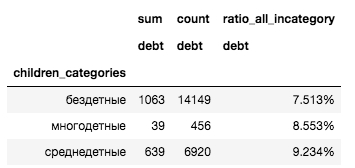

**Семейное положение:**  
Здесь опять наблюдается разброс заполненности групп. Среди групп имеющих наибольшее заполнение наиболее надежными заемщиками являются колиенты состоящие в браке, они с меньшей вероятностью просрочат кредит (7.520%), чем клиенты  в группе не женат/ не замужем (9.740%). Возможно, люди в браке более успешно мыслят в рамках долгосрочной перспективы.
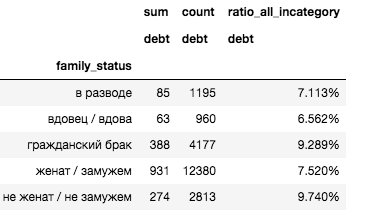

**Уровень дохода:**  
Здесь группы распределились наиболее равномерно. Среди более надежных заемщиков можно выделить людей с высоким доходом, у них вероятность вернуть кедит позже срока меньше других в группе - 7.500%. Выглядит вполне логично! Однако между клиентами с низким и средним доходом отдать предпочтение стоит первым.
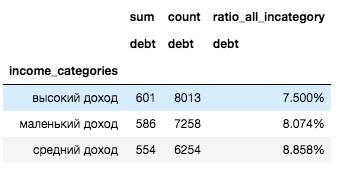

**Цель кредита:**  
Большую долю обращений за кредитами составлют операции с недвижимостью, коммерческои и некоммерческой. Однако люди, взявшие кредит на эти цели успешнее справляется с возвращением кредита в срок. У клиентов, взявших кредит на обучение и покупку автомобиля больше вероятность его просрочить. Возможно потому, что в первом случае людям приходится дйствительно учиться, остается меньше возможностей работать, меньше источников дохода.
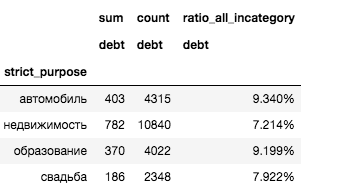

Если все же попытаться оценить зависимости возвращения кредита в срок от тех или иных характеристик человека, наверное с учетом особенностей представленных данных стоит опираться на ни динамику возврата долга именно в самой группе. Так, среди подкатегорий наиболее надежными можно считать бездетных, взявших кредит на недвижимость и вдовцов.

<font color=blue> Да, здорово, теперь выводы - это маленький отчет о проделанной работе.
    
---

---
## Комментарий от наставника

Выводы описаны слишком кратко. Надо расписывать их более подробно и объяснять представленные доводы. В выводах можно приводить полученные ранее значения. Желательно подробно расписать все, что было сделано и какими методами. Так ты лишний раз вспомнишь, что делает та или иная функция.

---

## Комментарий от наставника

- Описывай данные, с которыми работаешь;
- Выдвигай больше гипотез. Пытайся понять реальны они или нет и проверяй их на практике;
- Удаляй дубликаты из данных. Они вызывают смещение результатов;
- Хорошо бы оставлять комментарии в коде. Так и тебе, и другим людям будет понятно, что делает определенный кусок кода;
- Изучи метод сводных таблиц и применяй его в дальнейших проектах.

Ты проделал хорошую работу, молодец! Исправь небольшой недостаток и получится замечательная работа :)

-----